NOTE : Since there are so many different sections in  this code, if at any instant of time..RAM capacity exceeds, please terminate runtime and run only the required section

DATASET PATH - /content/drive/MyDrive/RS/ml-20m

In [2]:
!pip install scikit-surprise

     |████████████████████████████████| 11.8 MB 7.8 MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1630157 sha256=b1d26901c52822ff3a064ceabf5bc3d28a90b5270621581f18b563996999c5fb
  Stored in directory: /root/.cache/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise


In [3]:
import surprise
from surprise import Dataset
import pandas as pd
from surprise import Reader
import numpy as np

In [4]:
!pip install lenskit

     |████████████████████████████████| 74 kB 2.0 MB/s 
     |████████████████████████████████| 256 kB 16.5 MB/s 
     |████████████████████████████████| 87 kB 6.8 MB/s 


In [5]:
ratings_csv= pd.read_csv('/content/drive/MyDrive/RS/ml-20m/ratings.csv')
ratings_csv.drop(columns="timestamp",inplace=True);
ratings_csv

,userId,movieId,rating
0,1,2,3.5
1,1,29,3.5
2,1,32,3.5
3,1,47,3.5
4,1,50,3.5
...,...,...,...
20000258,138493,68954,4.5
20000259,138493,69526,4.5
20000260,138493,69644,3.0
20000261,138493,70286,5.0


#Q1. Dataset Analysis

In [ ]:
print("No. of users : " , len(np.unique(ratings_csv["userId"])))


No. of users :  138493


In [ ]:
print("No. of items : " , len(np.unique(ratings_csv["movieId"])))


No. of items :  26744


##### Per MOVIE -> Count | Max_rating | Min_rating | Avg_rating

In [ ]:
per_movie_rating_count = pd.DataFrame(ratings_csv.groupby('movieId')['rating'].count(), columns=["rating"] )
per_movie_rating_count=per_movie_rating_count.rename(columns={'rating':'rating_count'})


In [ ]:
per_movie_rating_max = pd.DataFrame(ratings_csv.groupby('movieId')['rating'].max(), columns=["rating"] )
per_movie_rating_max=per_movie_rating_max.rename(columns={'rating':'max_rating'})


In [ ]:
per_movie_rating_min = pd.DataFrame(ratings_csv.groupby('movieId')['rating'].min(), columns=["rating"] )
per_movie_rating_min=per_movie_rating_min.rename(columns={'rating':'min_rating'})


In [ ]:
per_movie_rating_avg = pd.DataFrame(ratings_csv.groupby('movieId')['rating'].mean(), columns=["rating"] )
per_movie_rating_avg=per_movie_rating_avg.rename(columns={'rating':'avg_rating'})


In [ ]:
recipe_summary_df = per_movie_rating_count.merge(per_movie_rating_max,on='movieId')\
                    .merge(per_movie_rating_min,on='movieId')\
                    .merge(per_movie_rating_avg,on='movieId')
recipe_summary_df

,rating_count,max_rating,min_rating,avg_rating
movieId,,,,
1,49695,5.0,0.5,3.921240
2,22243,5.0,0.5,3.211977
3,12735,5.0,0.5,3.151040
4,2756,5.0,0.5,2.861393
5,12161,5.0,0.5,3.064592
...,...,...,...,...
131254,1,4.0,4.0,4.000000
131256,1,4.0,4.0,4.000000
131258,1,2.5,2.5,2.500000


##### 5 Most Rated Movie

In [ ]:
print(per_movie_rating_count.sort_values('rating_count', ascending=False ).head(5))

         rating_count
movieId              
296             67310
356             66172
318             63366
593             63299
480             59715


##### 5 least Rated Movies

In [ ]:
print(per_movie_rating_count.sort_values('rating_count', ascending=True ).head(5))

         rating_count
movieId              
131262              1
84436               1
84442               1
84500               1
84534               1


### Rating Distribution Plot

In [ ]:
import plotly.graph_objects as go

data = ratings_csv['rating'].value_counts().sort_index(ascending=False)
print("===RATING DISTRIBUTION===")
print(data)

print( "Rating Scale : ",  data.index)

trace = go.Bar(x = data.index,
               text = ['{:.2f} %'.format(val) for val in (data.values /ratings_csv.shape[0] * 100)],
               textposition = 'auto',
               textfont = dict(color = '#000000'),
               y = data.values,
               )
# Create layout
layout = dict(title = 'Distribution Of {} movie ratings'.format(ratings_csv.shape[0]),
              xaxis = dict(title = 'Rating'),
              yaxis = dict(title = 'Count'))

fig = go.Figure(
    data=[trace], layout=layout
)
fig.show(renderer="colab")

===RATING DISTRIBUTION===
5.0    2898660
4.5    1534824
4.0    5561926
3.5    2200156
3.0    4291193
2.5     883398
2.0    1430997
1.5     279252
1.0     680732
0.5     239125
Name: rating, dtype: int64
Rating Scale :  Float64Index([5.0, 4.5, 4.0, 3.5, 3.0, 2.5, 2.0, 1.5, 1.0, 0.5], dtype='float64')


# Q2 . Recommendation

Compare the performance of modeling recommendation problem as the following:

a. Rating prediction

b. Classification task

c. Ranking a list problem

Evaluate the performance with RMSE and MAE for rating prediction, 

precision, recall and F1-score for classification, and 

nDCG and MRR for ranking. 

Implement the evaluation metrics from scratch. You are free to use models of your choice for each of the above parts and can use Surprise and Sklearn.

Also, show the surprise, diversity, novelty, and popularity of the recommended items.

In [6]:
import lenskit.datasets

Another way of readudng dataset using lenskit


In [7]:
ml20m = lenskit.datasets.MovieLens('/content/drive/MyDrive/RS/ml-20m')
ml20m.ratings

,user,item,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580
...,...,...,...,...
20000258,138493,68954,4.5,1258126920
20000259,138493,69526,4.5,1259865108
20000260,138493,69644,3.0,1260209457
20000261,138493,70286,5.0,1258126944


In [8]:
ml20m.movies

,title,genres
item,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy
...,...,...
131254,Kein Bund für's Leben (2007),Comedy
131256,"Feuer, Eis & Dosenbier (2002)",Comedy
131258,The Pirates (2014),Adventure


In [ ]:
ml20m.tags

,user,item,tag,timestamp
0,18,4141,Mark Waters,1240597180
1,65,208,dark hero,1368150078
2,65,353,dark hero,1368150079
3,65,521,noir thriller,1368149983
4,65,592,dark hero,1368150078
...,...,...,...,...
465559,138446,55999,dragged,1358983772
465560,138446,55999,Jason Bateman,1358983778
465561,138446,55999,quirky,1358983778
465562,138446,55999,sad,1358983772


In [ ]:
ml20m.tag_genome

tag,007,007 (series),18th century,1920s,1930s,1950s,1960s,1970s,1980s,19th century,...,world politics,world war i,world war ii,writer's life,writers,writing,wuxia,wwii,zombie,zombies
item,,,,,,,,,,,,,,,,,,,,,
1,0.02500,0.02500,0.05775,0.09675,0.14675,0.21700,0.06700,0.26275,0.26200,0.03200,...,0.03950,0.01800,0.04575,0.03275,0.12500,0.04150,0.01925,0.03625,0.07775,0.02300
2,0.03975,0.04375,0.03775,0.04800,0.11025,0.07250,0.04775,0.10975,0.09925,0.02050,...,0.04175,0.01925,0.01725,0.02425,0.12550,0.02250,0.01550,0.01475,0.09025,0.01875
3,0.04350,0.05475,0.02800,0.07700,0.05400,0.06850,0.05600,0.18500,0.04925,0.02675,...,0.04150,0.02675,0.02775,0.03425,0.15550,0.03675,0.01700,0.01950,0.09700,0.01850
4,0.03725,0.03950,0.03675,0.03100,0.06825,0.04050,0.02325,0.08700,0.05125,0.03025,...,0.05750,0.03375,0.02275,0.03975,0.18525,0.05925,0.01500,0.01525,0.06450,0.01300
5,0.04200,0.05275,0.05925,0.03675,0.07525,0.12525,0.02850,0.08500,0.02950,0.02875,...,0.04250,0.02825,0.02150,0.02600,0.14275,0.02075,0.01650,0.01675,0.10750,0.01825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130578,0.15400,0.04025,0.01975,0.01850,0.02850,0.02275,0.01000,0.03675,0.01025,0.01575,...,0.02875,0.01125,0.01250,0.02050,0.21000,0.02375,0.04225,0.00525,0.07575,0.01325
130840,0.02400,0.03025,0.02425,0.09375,0.05600,0.06025,0.02100,0.12900,0.11275,0.03650,...,0.02125,0.04250,0.01025,0.20350,0.47675,0.10775,0.06200,0.00775,0.27000,0.13375
131013,0.04200,0.03175,0.01700,0.05600,0.05750,0.02675,0.01600,0.04200,0.02800,0.03725,...,0.06675,0.01300,0.01275,0.02275,0.20000,0.10750,0.02500,0.00950,0.07550,0.01625


Finally something found for user based splitting !!! 
:)

Reference link- https://lkpy.readthedocs.io/en/stable/crossfold.html#row-based-splitting

In [ ]:
import lenskit.crossfold as xf

In [ ]:
ratings = ml20m.ratings.rename(columns={'userId': 'user', 'movieId': 'item'})


In [ ]:
for i, tp in enumerate(xf.partition_users(ratings, 5, xf.SampleN(5))):
    tp.train.to_csv('/content/drive/MyDrive/RS/ml-20m/ml-20m.exp/train-%d.csv' % (i,))
    tp.train.to_parquet('/content/drive/MyDrive/RS/ml-20m/ml-20m.exp/train-%d.parquet '% (i,))
    tp.test.to_csv('/content/drive/MyDrive/RS/ml-20m/ml-20m.exp/test-%d.csv' % (i,))
    tp.test.to_parquet('/content/drive/MyDrive/RS/ml-20m/ml-20m.exp/test-%d.parquet '%(i,))

    break;

In [ ]:
tp.train

,user,item,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580
...,...,...,...,...
20000258,138493,68954,4.5,1258126920
20000259,138493,69526,4.5,1259865108
20000260,138493,69644,3.0,1260209457
20000261,138493,70286,5.0,1258126944


In [ ]:
tp.test

,user,item,rating,timestamp
294,3,1213,5.0,944917691
260,3,718,3.0,944917267
373,3,2505,4.0,944897783
396,3,2699,3.0,945175870
399,3,2750,4.0,944918444
...,...,...,...,...
19999590,138488,586,3.0,835387104
19999580,138488,231,2.0,835386725
19999583,138488,377,3.0,835386989
19999578,138488,207,3.0,835387188


In [ ]:
trainset=tp.train.drop(columns=['timestamp'])
trainset

In [ ]:
testset=tp.test.drop(columns=['timestamp'])
testset

Instead of re-splitting we can simply read

In [ ]:
trainset= pd.read_csv('/content/drive/MyDrive/RS/ml-20m/ml-20m.exp/train-0.csv')
trainset.drop(columns="timestamp",inplace=True);

testset= pd.read_csv('/content/drive/MyDrive/RS/ml-20m/ml-20m.exp/test-0.csv')
testset.drop(columns="timestamp",inplace=True);

In [ ]:
testset

,Unnamed: 0,user,item,rating
0,294,3,1213,5.0
1,260,3,718,3.0
2,373,3,2505,4.0
3,396,3,2699,3.0
4,399,3,2750,4.0
...,...,...,...,...
138490,19999590,138488,586,3.0
138491,19999580,138488,231,2.0
138492,19999583,138488,377,3.0
138493,19999578,138488,207,3.0


In [ ]:
trainset

,Unnamed: 0,user,item,rating
0,0,1,2,3.5
1,1,1,29,3.5
2,2,1,32,3.5
3,3,1,47,3.5
4,4,1,50,3.5
...,...,...,...,...
19861763,20000258,138493,68954,4.5
19861764,20000259,138493,69526,4.5
19861765,20000260,138493,69644,3.0
19861766,20000261,138493,70286,5.0


#RATING PREDICTION

In [ ]:
# import lenskit.algorithms.item_knn
# item_item_knn = lenskit.algorithms.item_knn.ItemItem(nnbrs=20, min_nbrs=1, min_sim=0.002, save_nbrs=None, feedback='explicit');
# item_item_knn.fit(trainset[:1000])
#testset.user[0]

In [ ]:
from surprise.model_selection import GridSearchCV
from surprise import KNNWithMeans
from surprise import accuracy
import matplotlib.pyplot as plt

In [ ]:
reader = Reader(rating_scale=(0.5, 5))
Train_Data= Dataset.load_from_df(trainset[["user",	"item",	"rating"]][0:1000], reader)
Train_Data

Building Dataset from full train set 

In [ ]:
Train_Data.build_full_trainset()

In [ ]:
TestSet=list(testset[["user",	"item",	"rating"]][0:500].itertuples(index=False, name=None))
TestSet

In [ ]:
K_list=[10, 20 , 50 , 100];
FOLD_CNT=5

param_grid_normalization = {'k': K_list,
              'sim_options': {'name':  ['cosine'],                            
                              'user_based': [True]
                             }
              }

print(param_grid_normalization)

{'k': [10, 20, 50, 100], 'sim_options': {'name': ['cosine'], 'user_based': [True]}}


In [ ]:
gs_mean_centering = GridSearchCV(KNNWithMeans, param_grid_normalization, measures=['rmse','mae'], cv=FOLD_CNT, refit=True)
gs_mean_centering.fit(Train_Data)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing th

In [ ]:
print(gs_mean_centering.cv_results)
print("Best RMSE score (Mean Centering) ", gs_mean_centering.best_score['rmse'])
print("Best MAE score (Mean Centering) ", gs_mean_centering.best_score['mae'])

print(" K parameter that gave the best RMSE score (Mean Centering)",gs_mean_centering.best_params['rmse'])


{'split0_test_rmse': array([0.947747, 0.947747, 0.947747, 0.947747]), 'split1_test_rmse': array([0.95900726, 0.95900726, 0.95900726, 0.95900726]), 'split2_test_rmse': array([0.93020638, 0.93020638, 0.93020638, 0.93020638]), 'split3_test_rmse': array([0.95039649, 0.95039649, 0.95039649, 0.95039649]), 'split4_test_rmse': array([0.99174827, 0.99174827, 0.99174827, 0.99174827]), 'mean_test_rmse': array([0.95582108, 0.95582108, 0.95582108, 0.95582108]), 'std_test_rmse': array([0.02025658, 0.02025658, 0.02025658, 0.02025658]), 'rank_test_rmse': array([1, 2, 3, 4]), 'split0_test_mae': array([0.76493217, 0.76493217, 0.76493217, 0.76493217]), 'split1_test_mae': array([0.75507738, 0.75507738, 0.75507738, 0.75507738]), 'split2_test_mae': array([0.72369987, 0.72369987, 0.72369987, 0.72369987]), 'split3_test_mae': array([0.71431941, 0.71431941, 0.71431941, 0.71431941]), 'split4_test_mae': array([0.78610979, 0.78610979, 0.78610979, 0.78610979]), 'mean_test_mae': array([0.74882772, 0.74882772, 0.7488

In [ ]:
gs_mean_centering_predictions = gs_mean_centering.test(TestSet, verbose=True)


user: 3          item: 1213       r_ui = 5.00   est = 3.74   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: 3          item: 718        r_ui = 3.00   est = 3.74   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: 3          item: 2505       r_ui = 4.00   est = 3.74   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: 3          item: 2699       r_ui = 3.00   est = 3.74   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: 3          item: 2750       r_ui = 4.00   est = 3.74   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: 5          item: 370        r_ui = 4.00   est = 4.74   {'actual_k': 1, 'was_impossible': False}
user: 5          item: 832        r_ui = 5.00   est = 3.74   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: 5          item: 2          r_ui = 3.00   est = 4.07   {'actual_k': 1, 'was_impossible': False}
user: 5          item: 475  

In [ ]:
type(gs_mean_centering_predictions[0]), len(gs_mean_centering_predictions)

(surprise.prediction_algorithms.predictions.Prediction, 500)

In [ ]:
type(list(gs_mean_centering_predictions[0])), list(gs_mean_centering_predictions[0])

(list,
 [3,
  1213,
  5.0,
  3.7385,
  {'reason': 'User and/or item is unknown.', 'was_impossible': True}])

In [ ]:
true_ratings=[];
predicted_ratings=[];

for i in range(0, len(gs_mean_centering_predictions)):
  R=list(gs_mean_centering_predictions[i]);

  #print(R[2]);

  true_ratings.append(R[2]);
  #print(R[3]);

  predicted_ratings.append(R[3])


In [ ]:
#true_ratings, predicted_ratings

## RMSE 

In [ ]:
import math

In [ ]:
def myRMSE(TR, PR):
  TR=np.array(TR);
  PR=np.array(PR);
  N=len(TR);
  rmse = math.sqrt(sum((TR-PR)**2)/ N);
  return rmse;

myRMSE(true_ratings, predicted_ratings)

1.001340451884457

##MAE

In [ ]:
def myMAE(TR, PR):
  TR=np.array(TR);
  PR=np.array(PR);
  N=len(TR);
  mae = sum(abs(TR-PR))/ N;
  return mae;

myMAE(true_ratings, predicted_ratings)

0.8029361877586926

just to cross checck rmse and mae values (from existing functions)

In [ ]:
print("RMSE on Test Set ", accuracy.rmse(gs_mean_centering_predictions, verbose=False))
print("MAE on Test Set ", accuracy.mae(gs_mean_centering_predictions, verbose=False))

RMSE on Test Set  1.0013404518844566
MAE on Test Set  0.8029361877586922


#CLASSIFICATION PROBLEM

In [9]:
ml20m.movies

,title,genres
item,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy
...,...,...
131254,Kein Bund für's Leben (2007),Comedy
131256,"Feuer, Eis & Dosenbier (2002)",Comedy
131258,The Pirates (2014),Adventure


In [10]:
ml20m.ratings

,user,item,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580
...,...,...,...,...
20000258,138493,68954,4.5,1258126920
20000259,138493,69526,4.5,1259865108
20000260,138493,69644,3.0,1260209457
20000261,138493,70286,5.0,1258126944


In [11]:
reduced_movie_set=ml20m.movies[0:50]
reduced_movie_set, reduced_movie_set.index


(                                                  title  \
 item                                                      
 1                                      Toy Story (1995)   
 2                                        Jumanji (1995)   
 3                               Grumpier Old Men (1995)   
 4                              Waiting to Exhale (1995)   
 5                    Father of the Bride Part II (1995)   
 6                                           Heat (1995)   
 7                                        Sabrina (1995)   
 8                                   Tom and Huck (1995)   
 9                                   Sudden Death (1995)   
 10                                     GoldenEye (1995)   
 11                       American President, The (1995)   
 12                   Dracula: Dead and Loving It (1995)   
 13                                         Balto (1995)   
 14                                         Nixon (1995)   
 15                              Cutthro

choosing users that rated / tagged reduced movie set


In [ ]:
ml20m.ratings

,user,item,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580
...,...,...,...,...
20000258,138493,68954,4.5,1258126920
20000259,138493,69526,4.5,1259865108
20000260,138493,69644,3.0,1260209457
20000261,138493,70286,5.0,1258126944


In [12]:
new_ratings = ml20m.ratings[(ml20m.ratings['rating'] >0) & ml20m.ratings['item'].isin(list(reduced_movie_set.index))];
new_ratings=new_ratings.head(100)
new_ratings

,user,item,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580
...,...,...,...,...
2303,22,6,5.0,994638573
2304,22,16,5.0,994638228
2305,22,47,4.0,994638077
2306,22,50,4.0,994637979


In [13]:
from collections import defaultdict

In [14]:
#dictionary where key is item name and value is list of tags

item_tag_dictionary=defaultdict(list)

global_tags=set();

#item_descriptors.shape[0]
for ii in range(0,reduced_movie_set.shape[0]):
  old_tag_list=reduced_movie_set.iloc[ii]['genres'].split('|');


  tag_list=[];

  for tg in old_tag_list:
    if len(tg)>2:
      tag_list.append(tg.strip());

  #print(tag_list)
  item_id=reduced_movie_set.index[ii];

  #print(item_id)

  item_tag_dictionary[item_id]=tag_list;

  global_tags=global_tags | set(tag_list); #| is used for union


print(len(item_tag_dictionary))
print(global_tags)
print(len(global_tags))


print("===========")



global_tags=list(global_tags);
#global_tags
#2-D Mat
item_tag_explode=[];


cnt_global_tags = len(global_tags);

####
Q_i_tags=[];

for r_n in item_tag_dictionary:

  LL=[0]*cnt_global_tags;

  Tag_L=item_tag_dictionary[r_n]; 
  
  idx= [global_tags.index(x) for x in Tag_L];
  #print(idx)

  for idx_i in idx:
    LL[idx_i]=1;
  
  #print(LL)
  F=[r_n];

  F.extend(LL);
  Q_i_tags.append(LL);

  item_tag_explode.append(F);

 #New data frame
cols=["item"];
cols.extend(global_tags);

item_tags_explode_df=pd.DataFrame.from_records(item_tag_explode, columns=cols );




50
{'Drama', 'War', 'Crime', 'Musical', 'Fantasy', 'Action', 'Animation', 'Children', 'Comedy', 'Sci-Fi', 'Adventure', 'Horror', 'Romance', 'Mystery', 'IMAX', 'Documentary', 'Thriller'}
17


In [15]:
item_tags_explode_df

,item,Drama,War,Crime,Musical,Fantasy,Action,Animation,Children,Comedy,Sci-Fi,Adventure,Horror,Romance,Mystery,IMAX,Documentary,Thriller
0,1,0,0,0,0,1,0,1,1,1,0,1,0,0,0,0,0,0
1,2,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,4,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4,5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
5,6,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1
6,7,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
7,8,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
8,9,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
9,10,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1


In [16]:
our_user_ids=new_ratings.user.unique();
print(len(our_user_ids))

21


In [17]:
our_user_ids_reduced=[]

user_profile_for_tags=[];


for u in our_user_ids:
  
  #Getting interactions for this user
  df = new_ratings[(new_ratings['user'] == u) ] ;

  #print(df.shape)

  if(df.shape[0]>2) :
    #print("User id ", u);
    
    our_item_id_list = df['item'].to_list();


    df=item_tags_explode_df[item_tags_explode_df['item'].isin(our_item_id_list)].drop(['item'], axis=1)

    #print(df)
    LL=[];
    for x in df.sum(axis=0).to_list():
      if x >0 :
        LL.append(1);
      else:
        LL.append(0);
    #print(LL)

    user_profile_for_tags.append(LL);
    our_user_ids_reduced.append(u);


    
 
  #print("==============================================")


print(len(our_user_ids_reduced))

17


In [18]:
print(user_profile_for_tags)
print(our_user_ids_reduced)

[[1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1], [1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1], [0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1], [1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0], [1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0], [1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0], [1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1], [1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1], [1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1], [1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1], [1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0], [1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1], [0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1], [1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1], [1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1], [1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1]]
[1, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 19, 21, 22]


In [19]:
Q_i_tags=np.array(Q_i_tags);
Q_i_tags=Q_i_tags.T
print(Q_i_tags)
print(Q_i_tags.shape)

[[0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1
  0 0 0 1 1 1 1 0 1 1 0 1 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1
  0 0 0 0 0 1 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 1 0 1 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0
  0 1 0 0 0 0 0 0 0 0 0 1 0 0]
 [1 0 1 1 1 0 1 0 0 0 1 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 1 1 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0

In [20]:
P_u_tags=np.array(user_profile_for_tags);
print(P_u_tags)
print(P_u_tags.shape)



[[1 0 1 0 1 0 0 1 0 1 1 0 0 1 0 0 1]
 [1 0 1 0 1 0 1 1 1 1 1 0 0 1 0 0 1]
 [0 0 1 0 0 1 0 0 1 1 1 0 0 1 0 0 1]
 [1 0 0 0 1 0 0 1 1 0 1 0 1 0 0 0 0]
 [1 0 0 0 1 0 1 1 1 0 1 0 1 0 0 0 0]
 [1 0 1 0 0 1 0 0 1 1 1 0 1 0 0 0 0]
 [1 0 1 1 1 1 1 1 1 0 1 0 1 1 0 0 1]
 [1 0 0 0 1 0 1 1 1 0 1 0 1 0 0 0 0]
 [0 0 0 0 1 1 1 1 1 1 1 0 1 1 0 0 1]
 [1 0 1 0 1 1 1 1 1 1 1 0 1 1 0 0 1]
 [1 0 0 0 1 1 1 1 1 1 1 0 1 1 0 0 1]
 [1 0 0 0 1 0 1 1 1 0 1 0 1 0 0 0 0]
 [1 0 1 0 0 1 0 1 1 0 1 0 1 1 0 0 1]
 [0 0 1 0 1 1 1 1 1 0 1 0 1 0 0 0 1]
 [1 0 1 0 1 1 1 1 1 1 1 0 1 1 0 0 1]
 [1 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 1]
 [1 0 1 0 1 1 1 1 1 0 1 0 0 1 0 0 1]]
(17, 17)


The score that capture the relevance to user u of item i is simply the 
similarity of vectors Q_i and P_u

In [21]:
sim_u_i= np.dot(P_u_tags,Q_i_tags);
print(sim_u_i)
print(sim_u_i.shape)


[[3 3 0 1 0 2 0 2 0 2 1 0 2 1 1 2 1 0 0 3 2 4 2 2 1 1 2 1 5 2 1 3 1 2 1 2
  0 1 0 1 1 2 1 2 2 1 2 2 1 3]
 [5 3 1 2 1 2 1 2 0 2 2 1 3 1 1 2 1 1 1 4 3 4 2 2 1 1 2 1 5 2 1 3 1 2 1 2
  0 2 1 1 1 2 1 2 3 1 2 3 1 3]
 [2 1 1 1 1 3 1 1 1 3 1 1 1 0 2 1 0 1 1 4 3 3 3 1 0 0 0 0 3 1 0 3 1 0 0 1
  0 1 1 0 0 2 0 2 2 0 2 0 0 3]
 [4 3 2 3 1 0 2 2 0 1 3 1 2 1 2 1 2 1 1 2 1 1 0 1 2 1 2 2 3 1 1 0 2 2 2 1
  0 2 2 1 1 1 1 2 2 2 0 3 2 0]
 [5 3 2 3 1 0 2 2 0 1 3 1 3 1 2 1 2 1 1 2 1 1 0 1 2 1 2 2 3 1 1 0 2 2 2 1
  0 2 2 1 1 1 1 2 2 2 0 4 2 0]
 [2 1 2 3 1 2 2 1 1 2 3 1 1 1 3 2 2 1 1 4 2 2 2 2 2 1 1 2 3 2 1 1 2 1 2 2
  0 1 2 1 1 3 1 2 2 2 0 2 2 1]
 [5 3 2 3 1 3 2 2 1 3 3 1 3 1 3 2 2 1 1 5 3 4 3 1 2 1 2 2 4 2 1 2 2 2 2 2
  0 2 2 1 1 3 1 3 3 2 2 5 2 3]
 [5 3 2 3 1 0 2 2 0 1 3 1 3 1 2 1 2 1 1 2 1 1 0 1 2 1 2 2 3 1 1 0 2 2 2 1
  0 2 2 1 1 1 1 2 2 2 0 4 2 0]
 [5 3 2 2 1 2 2 2 1 3 2 1 3 0 3 0 1 1 1 3 2 2 2 1 1 0 1 1 4 0 0 3 2 1 1 0
  0 2 2 0 0 1 0 3 2 1 2 3 1 2]
 [5 3 2 3 1 3 2 2 1 3 3 1 3 1 3 2 2 1 1 5 3 4 3 2 2 1 2

In [22]:
Movie_Names=reduced_movie_set['title'].to_list();
print(Movie_Names)
print(len(Movie_Names))


['Toy Story (1995)', 'Jumanji (1995)', 'Grumpier Old Men (1995)', 'Waiting to Exhale (1995)', 'Father of the Bride Part II (1995)', 'Heat (1995)', 'Sabrina (1995)', 'Tom and Huck (1995)', 'Sudden Death (1995)', 'GoldenEye (1995)', 'American President, The (1995)', 'Dracula: Dead and Loving It (1995)', 'Balto (1995)', 'Nixon (1995)', 'Cutthroat Island (1995)', 'Casino (1995)', 'Sense and Sensibility (1995)', 'Four Rooms (1995)', 'Ace Ventura: When Nature Calls (1995)', 'Money Train (1995)', 'Get Shorty (1995)', 'Copycat (1995)', 'Assassins (1995)', 'Powder (1995)', 'Leaving Las Vegas (1995)', 'Othello (1995)', 'Now and Then (1995)', 'Persuasion (1995)', 'City of Lost Children, The (Cité des enfants perdus, La) (1995)', 'Shanghai Triad (Yao a yao yao dao waipo qiao) (1995)', 'Dangerous Minds (1995)', 'Twelve Monkeys (a.k.a. 12 Monkeys) (1995)', 'Wings of Courage (1995)', 'Babe (1995)', 'Carrington (1995)', 'Dead Man Walking (1995)', 'Across the Sea of Time (1995)', 'It Takes Two (1995)',

In [23]:
Recommendations_based_on_tags=[];

our_movie_ids=reduced_movie_set.index.to_list();

for X in sim_u_i:
  
  Z = [x for _, x in sorted(zip(X,our_movie_ids ), key=lambda pair: pair[0])]
  #print(Z)

  Recommendations_based_on_tags.append(Z);


In [24]:
Recommendations_based_on_tags

[[3,
  5,
  7,
  9,
  12,
  18,
  19,
  37,
  39,
  4,
  11,
  14,
  15,
  17,
  25,
  26,
  28,
  31,
  33,
  35,
  38,
  40,
  41,
  43,
  46,
  49,
  6,
  8,
  10,
  13,
  16,
  21,
  23,
  24,
  27,
  30,
  34,
  36,
  42,
  44,
  45,
  47,
  48,
  1,
  2,
  20,
  32,
  50,
  22,
  29],
 [9,
  37,
  3,
  5,
  7,
  12,
  14,
  15,
  17,
  18,
  19,
  25,
  26,
  28,
  31,
  33,
  35,
  39,
  40,
  41,
  43,
  46,
  49,
  4,
  6,
  8,
  10,
  11,
  16,
  23,
  24,
  27,
  30,
  34,
  36,
  38,
  42,
  44,
  47,
  2,
  13,
  21,
  32,
  45,
  48,
  50,
  20,
  22,
  1,
  29],
 [14,
  17,
  25,
  26,
  27,
  28,
  31,
  34,
  35,
  37,
  40,
  41,
  43,
  46,
  48,
  49,
  2,
  3,
  4,
  5,
  7,
  8,
  9,
  11,
  12,
  13,
  16,
  18,
  19,
  24,
  30,
  33,
  36,
  38,
  39,
  1,
  15,
  42,
  44,
  45,
  47,
  6,
  10,
  21,
  22,
  23,
  29,
  32,
  50,
  20],
 [6,
  9,
  23,
  32,
  37,
  47,
  50,
  5,
  10,
  12,
  14,
  16,
  18,
  19,
  21,
  22,
  24,
  26,
  30,
  31,
  36,
 

## Precision, Recall and F1-score

In [25]:
from pandas._libs.hashtable import unique_label_indices
def get_TopNRecommendations_And_Precision( u , Mat , N):

  u_id= our_user_ids_reduced[u];
  #print(Mat[u][0:N-1]);
  Top_N_item_id = Mat[u][0:N-1];

  #calc precision

  #our_item_ids

  Top_N_item_Names = reduced_movie_set[reduced_movie_set.index.isin(Top_N_item_id)]['title'].to_list();
  
  print("Recommended items : ", Top_N_item_Names);


  #df = new_ratings[(new_ratings['user_id'] == u_id)  ] ;
  

  df = new_ratings[(new_ratings['user'] == u_id) & (new_ratings['item'].isin(Top_N_item_id) ) ] ;
  #print(df)
  #print(df.shape)

  relevant_recommended_item_ids = df['item'].to_list();


  relevant_recommended_item_names = reduced_movie_set[reduced_movie_set.index.isin(relevant_recommended_item_ids)]['title'].to_list();
  print("Relevant Recommended items : ", relevant_recommended_item_names);

  ###-------RECALL--------------

  df2 = new_ratings[(new_ratings['user'] == u_id) & (new_ratings['rating'] > 3) ] ;
  # print(df2)
  # print(df2.shape)

  if len(relevant_recommended_item_names)==0 or len(df2)==0:
    recall= 0;
  else :
    recall= len(relevant_recommended_item_names) / len(df2);






  if len(relevant_recommended_item_names)==0:
    precision= 0;
  else :
    precision= len(relevant_recommended_item_names) / N;












  return precision,recall



N_list = [2, 5, 10,12 ,15,16]

Avg_precision_for_each_N= [];
Avg_recall_for_each_N=[];


for N in N_list:
  print("Top N = ", N , " recommendations for each user");

  
  Avg_Precision_list_tags=[];
  Avg_Recall_list_tags=[];

  for u in range(0,len(our_user_ids_reduced)):
    u_id= our_user_ids_reduced[u];

    print("User_id : ", u_id)

    U_precision, U_recall = get_TopNRecommendations_And_Precision(u,Recommendations_based_on_tags, N );

    print("Precision : ", U_precision);

    if U_precision >0:
      Avg_Precision_list_tags.append(U_precision);

    print("Recall : ", U_recall);

    if U_recall >0:
      Avg_Recall_list_tags.append(U_recall);

    print("====================================================================================================")

    


  if len(Avg_Precision_list_tags) > 0:
    AP = sum(Avg_Precision_list_tags) / len(Avg_Precision_list_tags);
  else: 
    AP=0;  

   
  print("AVERAGE PRECISION IN CASE OF ONE-HOT KEYWORDS (item TAGS) : " , AP )
  




  if len(Avg_Recall_list_tags) > 0:
    AR = sum(Avg_Recall_list_tags) / len(Avg_Recall_list_tags);
  else: 
    AR=0;  


  print("AVERAGE RECALL IN CASE OF ONE-HOT KEYWORDS (item TAGS) : ", AR)


  Avg_precision_for_each_N.append(AP)
  Avg_recall_for_each_N.append(AR)




  print("\n\n====================================================================================================")

  print("====================================================================================================")

  print("====================================================================================================")

 


Top N =  2  recommendations for each user
User_id :  1
Recommended items :  ['Grumpier Old Men (1995)']
Relevant Recommended items :  []
Precision :  0
Recall :  0
User_id :  3
Recommended items :  ['Sudden Death (1995)']
Relevant Recommended items :  []
Precision :  0
Recall :  0
User_id :  4
Recommended items :  ['Nixon (1995)']
Relevant Recommended items :  []
Precision :  0
Recall :  0
User_id :  5
Recommended items :  ['Heat (1995)']
Relevant Recommended items :  []
Precision :  0
Recall :  0
User_id :  6
Recommended items :  ['Heat (1995)']
Relevant Recommended items :  []
Precision :  0
Recall :  0
User_id :  7
Recommended items :  ['Across the Sea of Time (1995)']
Relevant Recommended items :  []
Precision :  0
Recall :  0
User_id :  8
Recommended items :  ['Across the Sea of Time (1995)']
Relevant Recommended items :  []
Precision :  0
Recall :  0
User_id :  10
Recommended items :  ['Heat (1995)']
Relevant Recommended items :  []
Precision :  0
Recall :  0
User_id :  11
Recomm

[0, 0.2, 0.1, 0.08333333333333333, 0.13333333333333336, 0.125]
[2, 5, 10, 12, 15, 16]


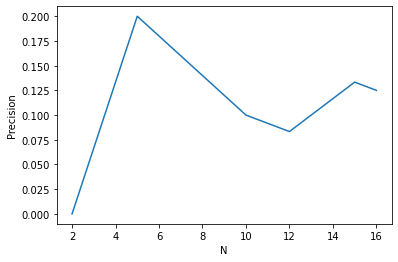

In [ ]:
print(Avg_precision_for_each_N)
print(N_list)

import matplotlib.pyplot as plt

plt.figure();
plt.plot( N_list,Avg_precision_for_each_N)
plt.xlabel("N")
plt.ylabel("Precision")

plt.show()

We are getting best precision with N=5

[0, 0.3333333333333333, 0.38333333333333336, 0.38333333333333336, 0.6166666666666666, 0.6166666666666666]
[2, 5, 10, 12, 15, 16]


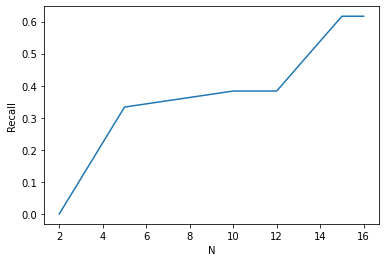

In [ ]:
print(Avg_recall_for_each_N)
print(N_list)

import matplotlib.pyplot as plt

plt.figure();
plt.plot( N_list,Avg_recall_for_each_N)
plt.xlabel("N")
plt.ylabel("Recall")

plt.show()

[0, 0.25, 0.1586206896551724, 0.1369047619047619, 0.21925925925925926, 0.20786516853932585]


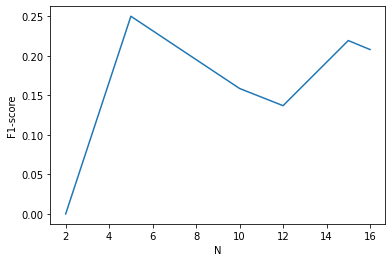

In [ ]:
F1_score=[(2*a*b)/(a+b) if (a+b) !=0 else 0 for a,b in zip(Avg_recall_for_each_N,Avg_precision_for_each_N)]
print(F1_score)


plt.figure();
plt.plot( N_list,F1_score)
plt.xlabel("N")
plt.ylabel("F1-score")

plt.show()

#RANKING A LIST PROBLEM


In [47]:
def get_Top_N_List( u , Mat , N):

  u_id= our_user_ids_reduced[u];
  #print(Mat[u][0:N-1]);
  Top_N_item_id = Mat[u][0:N-1];

  Top_N_item_Names = reduced_movie_set[reduced_movie_set.index.isin(Top_N_item_id)]['title'].to_list();
  
  print("Recommended items : ", Top_N_item_Names);





In [49]:
N_=5
for u in range(0,len(our_user_ids_reduced)):
  u_id= our_user_ids_reduced[u];

  print("User_id : ", u_id)

  get_Top_N_List(u,Recommendations_based_on_tags, N_ );

User_id :  1
Recommended items :  ['Grumpier Old Men (1995)', 'Father of the Bride Part II (1995)', 'Sabrina (1995)', 'Sudden Death (1995)']
User_id :  3
Recommended items :  ['Grumpier Old Men (1995)', 'Father of the Bride Part II (1995)', 'Sudden Death (1995)', 'Across the Sea of Time (1995)']
User_id :  4
Recommended items :  ['Nixon (1995)', 'Sense and Sensibility (1995)', 'Leaving Las Vegas (1995)', 'Othello (1995)']
User_id :  5
Recommended items :  ['Heat (1995)', 'Sudden Death (1995)', 'Assassins (1995)', 'Twelve Monkeys (a.k.a. 12 Monkeys) (1995)']
User_id :  6
Recommended items :  ['Heat (1995)', 'Sudden Death (1995)', 'Assassins (1995)', 'Twelve Monkeys (a.k.a. 12 Monkeys) (1995)']
User_id :  7
Recommended items :  ['Jumanji (1995)', 'Father of the Bride Part II (1995)', 'Across the Sea of Time (1995)', 'Seven (a.k.a. Se7en) (1995)']
User_id :  8
Recommended items :  ['Father of the Bride Part II (1995)', 'Sudden Death (1995)', 'Dracula: Dead and Loving It (1995)', 'Across t

### DCG, IDCG and RR 


In [61]:
import math
all_user_dcg = list()
all_user_idcg = list()
all_user_rr = list()

for i in range(len(our_user_ids_reduced[0:20])):
    u = our_user_ids_reduced[i]
    user_u_recommended_movies_ids = Recommendations_based_on_tags[i]
    user_u_ratings= ratings_csv[ratings_csv['userId'] == u]
    
    
    all_movies_user_u = user_u_ratings['movieId'].unique()
    relevant_recommended = set(user_u_recommended_movies_ids).intersection(set(all_movies_user_u))
    getting_ratings_corresponding_to_relevant_recommended = \
    user_u_ratings.loc[user_u_ratings['movieId'].isin(list(relevant_recommended))]

    print(getting_ratings_corresponding_to_relevant_recommended)

    sorted_ratings_corresponding_to_relevant_recommended = getting_ratings_corresponding_to_relevant_recommended.sort_values(by = 'rating', ascending = False)
    relevant_recommended_movie_ratings = list(sorted_ratings_corresponding_to_relevant_recommended['rating'].values)

    print(relevant_recommended_movie_ratings)
   
    relevance_score = len(relevant_recommended_movie_ratings)-1
    relevance_score_list= list()



    if len(relevant_recommended_movie_ratings) < 1:
        continue
        
    next_highest_rating= relevant_recommended_movie_ratings[0]

    for R in relevant_recommended_movie_ratings:
        if R == next_highest_rating:
            relevance_score_list.append(relevance_score)
        else:
            relevance_score = relevance_score-1
            relevance_score_list.append(relevance_score)
        next_highest_rating = R

    sorted_ratings_corresponding_to_relevant_recommended['relevance_scores'] = relevance_score_list

    print(sorted_ratings_corresponding_to_relevant_recommended)

    
    movie_relevance= dict(zip(list(sorted_ratings_corresponding_to_relevant_recommended['movieId']), \
    list(sorted_ratings_corresponding_to_relevant_recommended['relevance_scores'])));

    print(movie_relevance)
    
    
    ideal_relevant_recommended = [a for a in user_u_recommended_movies_ids if a in relevant_recommended]
    
    ideal_relevance = list()
    for i in ideal_relevant_recommended:
        ideal_relevance.append(movie_relevance[i])
        
    final_ideal_relevance = sorted(ideal_relevance, reverse = True)
    
    dcg = 0
    idcg = 0
    
    for i in range(1,len(ideal_relevance)+1):
        denominator=math.log2(i+1)
        dcg = dcg+ ((2**ideal_relevance[i-1] - 1) /denominator)
        idcg = idcg+ ((2**final_ideal_relevance[i-1] - 1) / denominator)
        
    rnk = ideal_relevance.index(max(ideal_relevance))+1
    RR = 1/rnk
    
    all_user_dcg.append(dcg)
    all_user_idcg.append(idcg)
    all_user_rr.append(RR)

print("all_user_dcg")
print(all_user_dcg)

print("all_user_idcg")
print(all_user_idcg)

print("all_user_rr")
print(all_user_rr)


   userId  movieId  rating
0       1        2     3.5
1       1       29     3.5
2       1       32     3.5
3       1       47     3.5
4       1       50     3.5
[3.5, 3.5, 3.5, 3.5, 3.5]
   userId  movieId  rating  relevance_scores
0       1        2     3.5                 4
1       1       29     3.5                 4
2       1       32     3.5                 4
3       1       47     3.5                 4
4       1       50     3.5                 4
{2: 4, 29: 4, 32: 4, 47: 4, 50: 4}
     userId  movieId  rating
236       3        1     4.0
237       3       24     3.0
238       3       32     4.0
239       3       50     5.0
[5.0, 4.0, 4.0, 3.0]
     userId  movieId  rating  relevance_scores
239       3       50     5.0                 3
236       3        1     4.0                 2
238       3       32     4.0                 2
237       3       24     3.0                 1
{50: 3, 1: 2, 32: 2, 24: 1}
     userId  movieId  rating
423       4        6     3.0
424       4       10

##nDCG and MRR

In [63]:
DCG = sum(all_user_dcg)/len(all_user_dcg)
IDCG = sum(all_user_idcg)/len(all_user_idcg)
nDCG = DCG/IDCG

print('DCG value: ', DCG)
print('IDCG value: ', IDCG)
print('NDCG value: ', nDCG)


MRR = sum(all_user_rr)/len(all_user_rr)

print('MRR  value ' , MRR)

DCG value:  155.6987947325305
IDCG value:  200.1703510770419
NDCG value:  0.7778314515350223
MRR  value  0.5313725490196077


# Q3. Matrix Factorization and Re-ranking 

Below snapshot : Ref. Lecture slides 

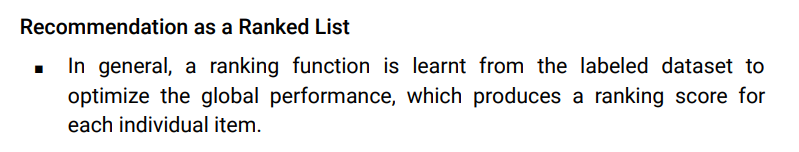

I have taken assumption the ranking score to be predicted rating

In [26]:
ratings_csv

,userId,movieId,rating
0,1,2,3.5
1,1,29,3.5
2,1,32,3.5
3,1,47,3.5
4,1,50,3.5
...,...,...,...
20000258,138493,68954,4.5
20000259,138493,69526,4.5
20000260,138493,69644,3.0
20000261,138493,70286,5.0


In [27]:
#Getting 20 users that gave rating to maximum no. of movies
per_user_rating_count = pd.DataFrame(ratings_csv.groupby('userId')['rating'].count(), columns=["rating"] )
per_user_rating_count=per_user_rating_count.rename(columns={'rating':'rating_count'})
print(per_user_rating_count.sort_values('rating_count', ascending=False )[900:920])

        rating_count
userId              
79662           1303
120666          1300
128893          1300
359             1300
62222           1299
103998          1297
88858           1297
116590          1295
18390           1294
33575           1294
6112            1294
16612           1294
31503           1293
64430           1293
7051            1293
17320           1293
48410           1292
95216           1292
2669            1292
123601          1292


In [28]:
MF_user_ids=list(per_user_rating_count.sort_values('rating_count', ascending=False )[900:920].index)
MF_user_ids, len(MF_user_ids)

([79662,
  120666,
  128893,
  359,
  62222,
  103998,
  88858,
  116590,
  18390,
  33575,
  6112,
  16612,
  31503,
  64430,
  7051,
  17320,
  48410,
  95216,
  2669,
  123601],
 20)

In [29]:
#extracting ratings corrresponding to our 20 MF usrs

MF_ratings=ratings_csv[ratings_csv['userId'].isin(MF_user_ids)]
MF_ratings

,userId,movieId,rating
46935,359,1,5.0
46936,359,6,5.0
46937,359,10,4.0
46938,359,11,4.0
46939,359,19,3.0
...,...,...,...
18620695,128893,48982,3.5
18620696,128893,50601,2.5
18620697,128893,53121,2.5
18620698,128893,53322,3.5


In [ ]:
MF_movie_ids=list(np.unique(MF_ratings['movieId']))
MF_movie_ids, len(MF_movie_ids)


In [31]:
ml20m.movies

,title,genres
item,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy
...,...,...
131254,Kein Bund für's Leben (2007),Comedy
131256,"Feuer, Eis & Dosenbier (2002)",Comedy
131258,The Pirates (2014),Adventure


In [32]:
MF_movies=ml20m.movies.reset_index(level=0)

In [33]:
All_users_MF_testDF=pd.core.frame.DataFrame();
All_users_MF_trainDF=pd.core.frame.DataFrame();


for u in MF_user_ids:
  print("user id" , u)
  DF_1_MF=MF_ratings[MF_ratings['userId']==u]
  print(DF_1_MF.shape)
  print(DF_1_MF)

  spilt_mark=int(DF_1_MF.shape[0]*0.3)
  print(spilt_mark)

  MF_testDF=DF_1_MF[0:spilt_mark];
  #print(MF_testDF)

  MF_trainDF=DF_1_MF[spilt_mark:];
  #print(MF_trainDF)

  All_users_MF_testDF=pd.concat([All_users_MF_testDF, MF_testDF], axis=0,ignore_index=True)
  All_users_MF_trainDF=pd.concat([All_users_MF_trainDF, MF_trainDF], axis=0,ignore_index=True)



 



user id 79662
(1303, 3)
          userId  movieId  rating
11541021   79662        1     3.0
11541022   79662        2     3.0
11541023   79662        4     3.0
11541024   79662        5     2.0
11541025   79662        7     4.0
...          ...      ...     ...
11542319   79662    27822     2.0
11542320   79662    30810     2.0
11542321   79662    30822     3.0
11542322   79662    30894     4.0
11542323   79662    33004     3.0

[1303 rows x 3 columns]
390
user id 120666
(1300, 3)
          userId  movieId  rating
17444772  120666        1     4.0
17444773  120666        2     2.5
17444774  120666        3     3.0
17444775  120666        6     3.5
17444776  120666       12     1.0
...          ...      ...     ...
17446067  120666    34530     2.5
17446068  120666    35836     3.0
17446069  120666    38061     5.0
17446070  120666    40278     4.0
17446071  120666    41997     4.5

[1300 rows x 3 columns]
390
user id 128893
(1300, 3)
          userId  movieId  rating
18619400  128893  

In [34]:
All_users_MF_testDF

,userId,movieId,rating
0,79662,1,3.0
1,79662,2,3.0
2,79662,4,3.0
3,79662,5,2.0
4,79662,7,4.0
...,...,...,...
7758,123601,1615,3.0
7759,123601,1616,2.0
7760,123601,1617,4.5
7761,123601,1625,3.5


In [35]:
All_users_MF_trainDF

,userId,movieId,rating
0,79662,1588,2.0
1,79662,1593,3.0
2,79662,1597,5.0
3,79662,1598,2.0
4,79662,1602,2.0
...,...,...,...
18139,123601,33162,3.5
18140,123601,33166,2.5
18141,123601,33493,1.5
18142,123601,33495,3.0


In [36]:
All_users_MF_testDF.columns=['user_id', 'item_id','rating']
All_users_MF_testDF

,user_id,item_id,rating
0,79662,1,3.0
1,79662,2,3.0
2,79662,4,3.0
3,79662,5,2.0
4,79662,7,4.0
...,...,...,...
7758,123601,1615,3.0
7759,123601,1616,2.0
7760,123601,1617,4.5
7761,123601,1625,3.5


In [37]:
All_users_MF_trainDF.columns=['user_id', 'item_id','rating']
All_users_MF_trainDF

,user_id,item_id,rating
0,79662,1588,2.0
1,79662,1593,3.0
2,79662,1597,5.0
3,79662,1598,2.0
4,79662,1602,2.0
...,...,...,...
18139,123601,33162,3.5
18140,123601,33166,2.5
18141,123601,33493,1.5
18142,123601,33495,3.0


In [38]:
pip install matrix_factorization


  Created wheel for matrix-factorization: filename=matrix_factorization-1.3-py3-none-any.whl size=16467 sha256=f04280e64520f1490b9141c20da7941b217db8c5db7b263047596b9c0e617913
  Stored in directory: /root/.cache/pip/wheels/f6/34/7b/11dd792f060e9c2d7230855147d3bfadbd2b6bbcf5132dcbbc
Successfully built matrix-factorization


In [39]:
from matrix_factorization import KernelMF
from sklearn.metrics import mean_squared_error

In [40]:
MF_X_train=All_users_MF_trainDF[['user_id', 'item_id']]
MF_y_train= All_users_MF_trainDF['rating']

MF_X_test=All_users_MF_testDF[['user_id', 'item_id']]
MF_y_test= All_users_MF_testDF['rating']


MATRIX FACTORIZATION

In [41]:
#linear kerrnel

%%time 
matrix_fact = KernelMF(n_epochs = 20, n_factors = 100, verbose = 1, lr = 0.001, reg = 0.005)
matrix_fact.fit(MF_X_train, MF_y_train)

MF_y_pred = matrix_fact.predict(MF_X_test)
rmse = mean_squared_error(MF_y_test, MF_y_pred, squared = False)

print(f'\nTest RMSE: {rmse:.4f}')

Epoch  1 / 20  -  train_rmse: 1.021815393814219
Epoch  2 / 20  -  train_rmse: 1.0085389542861427
Epoch  3 / 20  -  train_rmse: 1.002912289763199
Epoch  4 / 20  -  train_rmse: 0.998747647369643
Epoch  5 / 20  -  train_rmse: 0.9948656502046326
Epoch  6 / 20  -  train_rmse: 0.9910488426018564
Epoch  7 / 20  -  train_rmse: 0.9872784473439694
Epoch  8 / 20  -  train_rmse: 0.9835304216325788
Epoch  9 / 20  -  train_rmse: 0.9798274220021952
Epoch  10 / 20  -  train_rmse: 0.9761229731536715
Epoch  11 / 20  -  train_rmse: 0.9724264742692812
Epoch  12 / 20  -  train_rmse: 0.9687211486490036
Epoch  13 / 20  -  train_rmse: 0.9649997529081771
Epoch  14 / 20  -  train_rmse: 0.9612535389079278
Epoch  15 / 20  -  train_rmse: 0.9574795881113788
Epoch  16 / 20  -  train_rmse: 0.9536779479790252
Epoch  17 / 20  -  train_rmse: 0.9498226394621931
Epoch  18 / 20  -  train_rmse: 0.9459151502688328
Epoch  19 / 20  -  train_rmse: 0.9419355082240675
Epoch  20 / 20  -  train_rmse: 0.9378997442253815

Test RMSE: 

## Top 100 recommendations for 20 users

In [107]:
MF_top=100;

for u in MF_user_ids:  #Remove list slicing to get recommendations for all 20 users
  print("Top ", MF_top, " recommended movies ids with predicted ratings for USER : ", u)

  items_known = MF_X_test.query('user_id == @u')['item_id']
  #print(items_known)
  #print(items_known.shape)
  print(matrix_fact.recommend(user=u, items_known=items_known,amount=100))

  

Top  100  recommended movies ids with predicted ratings for USER :  79662
      user_id  item_id  rating_pred
1129    79662     4886     3.522613
853     79662     8340     3.374951
1419    79662    72733     3.337751
1920    79662     6874     3.322076
718     79662     4993     3.319814
...       ...      ...          ...
2737    79662    32291     3.176004
204     79662     4306     3.175274
5446    79662     8755     3.175141
4112    79662     4166     3.174759
2554    79662    51927     3.174222

[100 rows x 3 columns]
Top  100  recommended movies ids with predicted ratings for USER :  120666
      user_id  item_id  rating_pred
1111   120666     4886     3.261178
1966   120666     4896     3.223645
1227   120666     2291     3.223292
2258   120666     1866     3.194317
3514   120666     6976     3.181752
...       ...      ...          ...
5107   120666     2810     2.997921
781    120666     3196     2.997781
2699   120666     2366     2.997685
3590   120666     6358     2.997130

In [43]:
MF_movies

,item,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
27273,131254,Kein Bund für's Leben (2007),Comedy
27274,131256,"Feuer, Eis & Dosenbier (2002)",Comedy
27275,131258,The Pirates (2014),Adventure
27276,131260,Rentun Ruusu (2001),(no genres listed)


In [44]:
def remove_separator(text):
  text = text.lower()
  Final=text.replace("|"," ").replace("(","").replace(')',"");

  return Final



In [45]:
MF_movies["preprocess_genres"]= MF_movies['genres'].apply(remove_separator)
MF_movies

,item,title,genres,preprocess_genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,adventure animation children comedy fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy,adventure children fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance,comedy romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,comedy drama romance
4,5,Father of the Bride Part II (1995),Comedy,comedy
...,...,...,...,...
27273,131254,Kein Bund für's Leben (2007),Comedy,comedy
27274,131256,"Feuer, Eis & Dosenbier (2002)",Comedy,comedy
27275,131258,The Pirates (2014),Adventure,adventure
27276,131260,Rentun Ruusu (2001),(no genres listed),no genres listed


In [101]:
#Only for test user (this test user could be anyone of our 20 users)

MF_test_user_id=79662;

MF_test_user_ratings=MF_ratings[MF_ratings['userId']==MF_test_user_id]
print(MF_test_user_ratings)

MF_test_user_movies=list(MF_test_user_ratings['movieId'])
print(MF_test_user_movies)

MF_test_user_movie_DF=MF_movies[MF_movies['item'].isin(MF_test_user_movies)]

print(MF_test_user_movie_DF)
MF_test_user_movies=list(MF_test_user_movie_DF['item'])
print(MF_test_user_movies)

          userId  movieId  rating
11541021   79662        1     3.0
11541022   79662        2     3.0
11541023   79662        4     3.0
11541024   79662        5     2.0
11541025   79662        7     4.0
...          ...      ...     ...
11542319   79662    27822     2.0
11542320   79662    30810     2.0
11542321   79662    30822     3.0
11542322   79662    30894     4.0
11542323   79662    33004     3.0

[1303 rows x 3 columns]
[1, 2, 4, 5, 7, 8, 10, 11, 16, 17, 19, 20, 21, 22, 24, 27, 31, 34, 38, 39, 45, 47, 48, 50, 52, 62, 64, 65, 69, 70, 74, 75, 86, 88, 92, 94, 95, 104, 105, 107, 110, 135, 141, 145, 147, 150, 151, 153, 157, 158, 160, 161, 163, 168, 169, 170, 174, 179, 180, 185, 191, 193, 195, 203, 207, 208, 216, 217, 218, 222, 223, 224, 225, 231, 234, 236, 239, 248, 249, 252, 253, 260, 261, 262, 272, 273, 274, 275, 276, 277, 280, 282, 288, 289, 292, 296, 303, 305, 312, 314, 316, 317, 318, 327, 329, 333, 337, 339, 343, 344, 345, 349, 350, 351, 355, 356, 357, 358, 361, 364, 367, 368,

In [88]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity  


In [89]:
TFVEC = TfidfVectorizer()
TF_ITEMID = TFVEC.fit_transform((MF_test_user_movie_DF["preprocess_genres"]))
TF_COS_SIM = cosine_similarity(TF_ITEMID, TF_ITEMID)

TF_COS_SIM, TF_COS_SIM.shape

(array([[1.        , 0.78111776, 0.11250473, ..., 0.15336992, 0.        ,
         0.25981861],
        [0.78111776, 1.        , 0.        , ..., 0.        , 0.        ,
         0.2502725 ],
        [0.11250473, 0.        , 1.        , ..., 0.73355146, 0.13126856,
         0.12680383],
        ...,
        [0.15336992, 0.        , 0.73355146, ..., 1.        , 0.17894936,
         0.1728629 ],
        [0.        , 0.        , 0.13126856, ..., 0.17894936, 1.        ,
         0.51325226],
        [0.25981861, 0.2502725 , 0.12680383, ..., 0.1728629 , 0.51325226,
         1.        ]]), (1303, 1303))

In [90]:
TF_COS_SIM[0][10]

0.23889855448339112

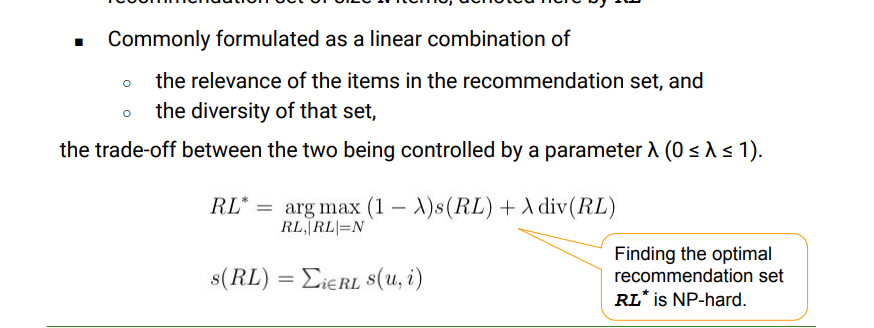

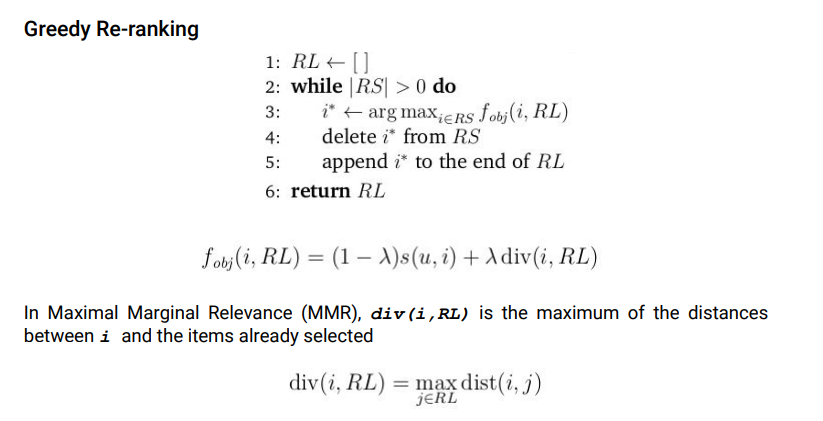

In [97]:
print(MF_test_user_id)
MF_test_user_100_recommendations = matrix_fact.recommend(user=MF_test_user_id, items_known=MF_X_train.query('user_id == @MF_test_user_id')['item_id'],amount=100)
MF_test_user_100_recommendations

79662


,user_id,item_id,rating_pred
597,79662,8340,3.374951
3779,79662,1541,3.350010
1034,79662,72733,3.337751
4813,79662,32314,3.311368
3312,79662,31658,3.297926
...,...,...,...
4026,79662,66544,3.160658
1668,79662,5436,3.157705
2218,79662,2239,3.157563
4891,79662,73713,3.157555


In [102]:
MF_test_user_100_recommendations[MF_test_user_100_recommendations['item_id'].isin(MF_test_user_movies)]

,user_id,item_id,rating_pred
3779,79662,1541,3.35001


In [ ]:
#ratings_csv[ratings_csv['userId']== MF_test_user_id]

In [96]:
RS_test_user_movies=list(MF_test_user_100_recommendations["item_id"])
print(RS_test_user_movies)

RS_test_user_sim1=list(MF_test_user_100_recommendations["rating_pred"])
RS_test_user_sim = [x / 5 for x in RS_test_user_sim1]
print(RS_test_user_sim)

[8340, 1541, 72733, 32314, 31658, 67420, 41571, 72117, 3246, 48774, 7054, 38886, 3006, 3685, 1953, 81413, 3328, 1963, 3104, 30749, 97938, 1488, 3833, 26649, 27728, 2561, 6331, 5574, 8464, 33463, 3598, 8638, 1589, 5607, 51255, 7122, 6183, 78445, 26776, 6064, 27722, 2682, 3822, 6595, 5291, 5446, 32582, 60514, 7716, 7315, 2662, 66762, 26903, 4500, 5011, 45210, 3265, 84983, 4654, 1904, 3868, 90357, 7096, 3159, 7099, 2289, 4394, 25944, 32291, 8755, 4166, 51927, 2565, 25834, 45668, 6548, 7034, 3494, 46578, 53996, 73681, 7698, 7029, 5306, 2920, 37830, 58299, 3197, 31193, 33794, 6163, 73323, 6429, 46335, 48738, 66544, 5436, 2239, 73713, 7121]
[0.6749902051046149, 0.6700019051307131, 0.6675501033701188, 0.6622736345879083, 0.659585295307326, 0.6575367964197532, 0.6535339724038975, 0.6530481567712932, 0.6516829679840714, 0.6513150892284758, 0.651114361664513, 0.6509754174520879, 0.6506788238682999, 0.6503803273557212, 0.6499469640966337, 0.6494286063849084, 0.6491814776953583, 0.6480769174984856

In [ ]:
MF_test_user_movies

In [ ]:
RL=[];
RS=RS_test_user_movies;

lambda_=0.5

def diversity(i,RL):
  if len(RL)==0:
    return 0;
  else:
    idx=MF_test_user_movies.index(i)
    print(idx)
    movie_list_sim= TF_COS_SIM[idx]

    # get index of elements present in RL

    max=0;
    for rl in RL:
      rl_i=MF_test_user_movies.index(rl)
      if TF_COS_SIM[idx][rl_i] >max:
        max= TF_COS_SIM[idx][rl_i]
    
    return max



def f (i, RL,RS):
  rs_idx=RS.index(i) 
  return (1-lambda_) * RS_test_user_sim[rs_idx] + lambda_*diversity(i,RL);



while len(RS) > 0:
  #print(len(RS))
  #print(len(RL))
  max_track_rs=0
  max_track_i=None
  for i in RS:
    #print("--i --- ", i)
    FF=f(i,RL,RS);
    #print("--FF ---" ,FF)
    if FF>max_track_rs:
      max_track_rs=FF;
      max_track_i=i;

  RL.append(max_track_i)
  RS.remove(max_track_i)      



print("Re-ranked list")
print(RL)